<a href="https://colab.research.google.com/github/avivhanoon/Machine-learning-project-Aviv-Hanoon/blob/main/Supervised_Learning_Flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment2 - Supervised Learning flow

## Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Aviv 9315
# student 2: Yuval 5966
# student 3: Yaniv 4258
# student 4: Yana 4504
# (o ptional) student 5: Segev 6765
# (optional) student 6:

## Part 2 - Experiments
You could add as many code cells as needed

### Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

### • Load trainset and testset and display head(5)

In [ ]:
# Load Train data CSV
url='https://drive.google.com/file/d/1TnmLLrJawsJV6Z8IG-vZ4bMczXgmV_nY/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
train_data = pd.read_csv(url)

url='https://drive.google.com/file/d/1iQas9fShulIt0lGxW2HBn3U2N-x5QlHu/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
test_data = pd.read_csv(url)

# Display 5 first elements of train and test
display(train_data.head(5))
display(test_data.head(5))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


### • EDA - at least 2 information tables and 2 visualizations

#### Display wine dataset correlations and plot a scatterplot between two columns with positive correlation

In [ ]:
display(train_data.corr())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.125775,0.266255,-0.324234,0.308843,0.271331,0.247231,-0.088818,0.137788,0.538669,-0.009125,0.066571,0.668455,-0.342386
malic_acid,0.125775,1.000000,0.191182,0.282662,0.020063,-0.322301,-0.388624,0.287977,-0.185538,0.250443,-0.550526,-0.328693,-0.150744,0.392434
ash,0.266255,0.191182,1.000000,0.423830,0.378546,0.161905,0.164921,0.148841,0.065193,0.270956,-0.067239,0.040355,0.275818,-0.109604
alcalinity_of_ash,-0.324234,0.282662,0.423830,1.000000,-0.011331,-0.314082,-0.328843,0.316834,-0.210546,-0.016108,-0.258432,-0.260420,-0.419231,0.502200
magnesium,0.308843,0.020063,0.378546,-0.011331,1.000000,0.209336,0.182837,-0.232630,0.145813,0.244744,0.021679,0.054141,0.388856,-0.215107
total_phenols,0.271331,-0.322301,0.161905,-0.314082,0.209336,1.000000,0.869634,-0.414451,0.625767,-0.068393,0.442778,0.716507,0.488763,-0.726069
flavanoids,0.247231,-0.388624,0.164921,-0.328843,0.182837,0.869634,1.000000,-0.515106,0.680019,-0.133475,0.529995,0.781781,0.489195,-0.838060
nonflavanoid_phenols,-0.088818,0.287977,0.148841,0.316834,-0.232630,-0.414451,-0.515106,1.000000,-0.382196,0.164591,-0.293616,-0.481035,-0.229793,0.455551
proanthocyanins,0.137788,-0.185538,0.065193,-0.210546,0.145813,0.625767,0.680019,-0.382196,1.000000,-0.028767,0.291350,0.546202,0.345552,-0.542524
color_intensity,0.538669,0.250443,0.270956,-0.016108,0.244744,-0.068393,-0.133475,0.164591,-0.028767,1.000000,-0.487257,-0.419104,0.350029,0.236329


##### We can see that Alcohol and Proline has a positive correlation, lets show it in a scatterplot:

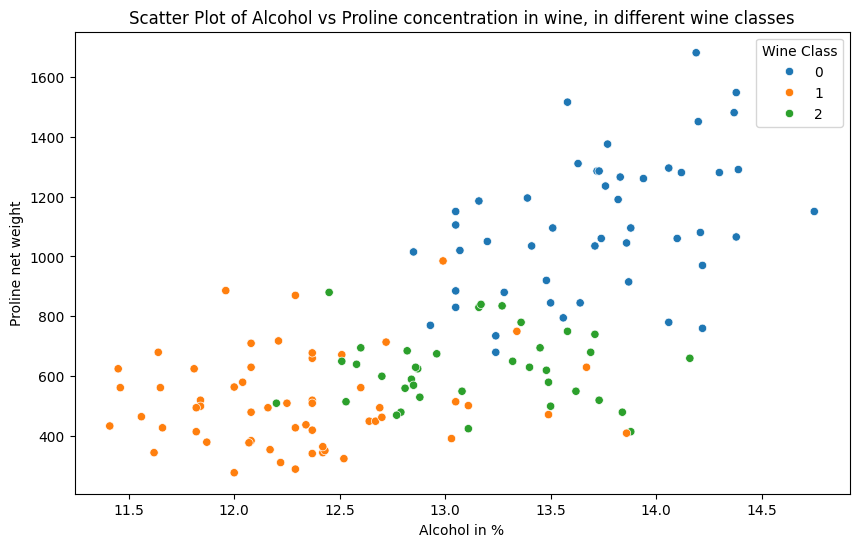

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='proline', hue='target', data=train_data, palette='tab10')
plt.title('Scatter Plot of Alcohol vs Proline concentration in wine, in different wine classes')
plt.xlabel('Alcohol in %')
plt.ylabel('Proline net weight')
plt.legend(title = 'Wine Class')
plt.show()

##### We can see that the alcohol percentage in wine usually indicates a different wine class

#### General info about the dataset

In [ ]:
display(train_data.describe())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


##### We can see that the alcohol concentration is distributed between 11.41% to 14.75%, lets make a histogram with the alcohol's distribution:

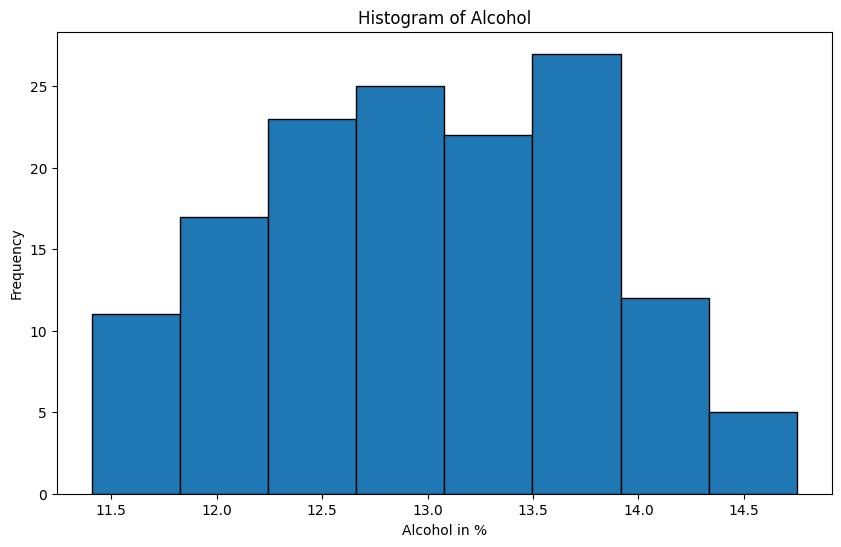

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(train_data['alcohol'], bins=8, edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol in %')
plt.ylabel('Frequency')
plt.show()

##### It's easy to see that most of the wine's alcohol percentage is around 13%

### • Feature Engineering

#### Principal Component Analysis on wine dataset while using scaled VS non scaled data

##### Separate features and target

In [ ]:
features = train_data.drop('target', axis=1)
target = train_data['target']

##### Standardize the data

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##### Perform PCA on scaled and non scaled features

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(features)
principal_components_scaled = pca.fit_transform(scaled_features)

##### Create a DataFrame with the scaled and non scaled principal components for comparison

In [ ]:
# Non Scaled:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = target
# Scaled:
pca_scaled_df = pd.DataFrame(data=principal_components_scaled, columns=['PC1', 'PC2'])
pca_scaled_df['target'] = target

##### Plot the scaled and non scaled analysis

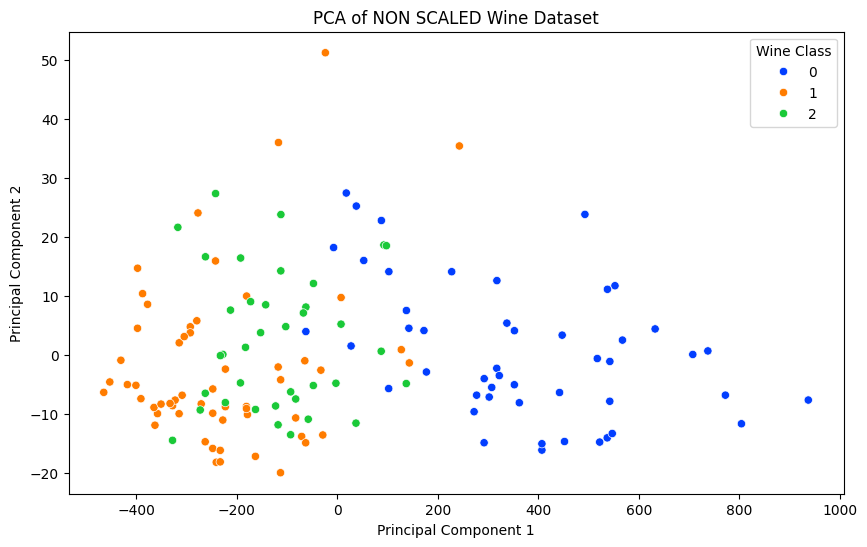

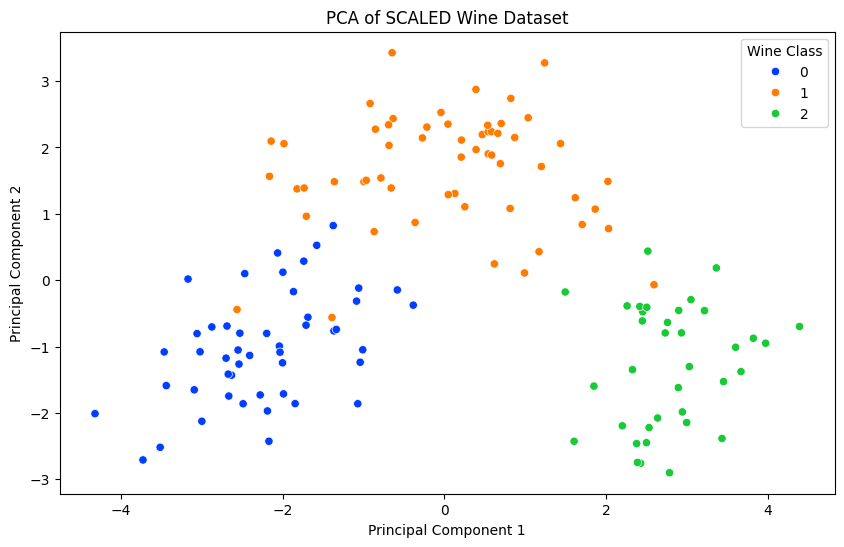

In [ ]:
# PCA non scaled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='bright')
plt.title('PCA of NON SCALED Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Wine Class')
plt.show()

# PCA scaled scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_scaled_df, palette='bright')
plt.title('PCA of SCALED Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title = 'Wine Class')
plt.show()

##### We can see that the scaled information is separated mostly evenly between 3 of the wine classes (the target) in the SCALED analysis

### • Training the model

#### Prepare training and test sets

In [ ]:
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']
X_test = test_data.drop(columns=['target'])
y_test = test_data['target']

##### Perform standard scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 1st Algorithm: KNN

##### Define hyperparameters

In [ ]:
knn_params = {'n_neighbors': [3, 4, 5], 'metric': ['euclidean', 'manhattan', 'chebyshev']}

##### Initialize a list to store results, train and evaluate the models with the different hyperparameters

In [ ]:
knn_results = []
for neighbor in knn_params['n_neighbors']:
    for metric in knn_params['metric']:
        knn = KNeighborsClassifier(n_neighbors=neighbor, metric=metric)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        knn_results.append({'n_neighbors': neighbor, 'metric': metric, 'accuracy': accuracy})

##### Convert results to DataFrame for better readability, and display predictions

In [ ]:
knn_results_df = pd.DataFrame(knn_results)
display(knn_results_df)

,n_neighbors,metric,accuracy
0,3,euclidean,0.944444
1,3,manhattan,0.972222
2,3,chebyshev,0.916667
3,4,euclidean,0.888889
4,4,manhattan,0.972222
5,4,chebyshev,0.861111
6,5,euclidean,0.972222
7,5,manhattan,0.972222
8,5,chebyshev,0.888889


##### We can see that with different k neighbors we get different accuracies, and that different metric systems also have an effect on the accuracy
##### Lets create a plot that shows the information:

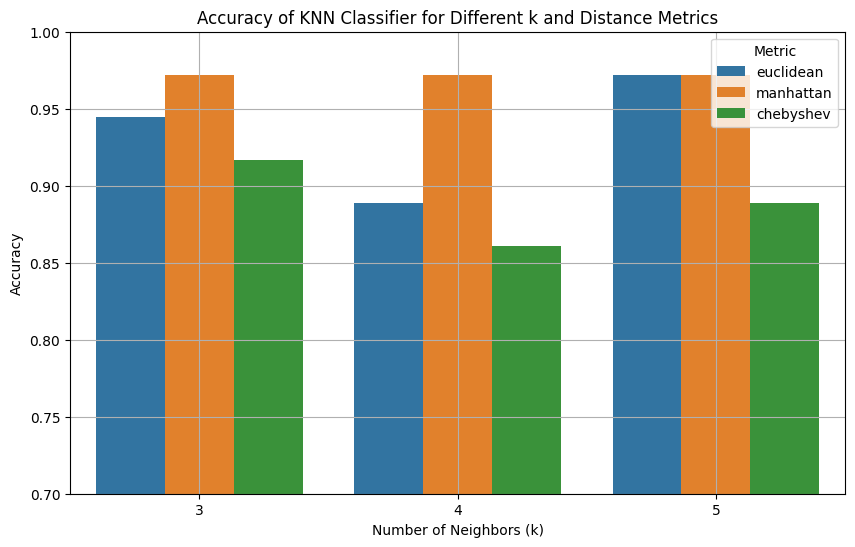

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=knn_results_df, x='n_neighbors', y='accuracy', hue='metric')
plt.title('Accuracy of KNN Classifier for Different k and Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)
plt.legend(title='Metric')
plt.grid(True)
plt.show()

#### 2nd Algorithm: Decision Trees

##### Define hyperparameters

In [ ]:
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5]}

##### Initialize a list to store results, train and evaluate the models with the different hyperparameters

In [ ]:
dt_results = []
for c in dt_params['criterion']:
    for d in dt_params['max_depth']:
        dt = DecisionTreeClassifier(criterion=c, max_depth=d)
        dt.fit(X_train_scaled, y_train)
        y_pred = dt.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        dt_results.append({'criterion': c, 'max_depth': d, 'accuracy': accuracy})

##### Convert results to DataFrame for better readability, and display predictions

In [ ]:
dt_results_df = pd.DataFrame(dt_results)
display(dt_results_df)

,criterion,max_depth,accuracy
0,gini,1,0.666667
1,gini,2,0.861111
2,gini,3,0.861111
3,gini,4,0.916667
4,gini,5,0.916667
5,entropy,1,0.583333
6,entropy,2,0.916667
7,entropy,3,0.916667
8,entropy,4,0.944444
9,entropy,5,0.944444


##### We can see that with different criterions we get different accuracies, and that the bigger the tree's max depth is, the better the accuracy is
##### Lets create a plot that shows the information:

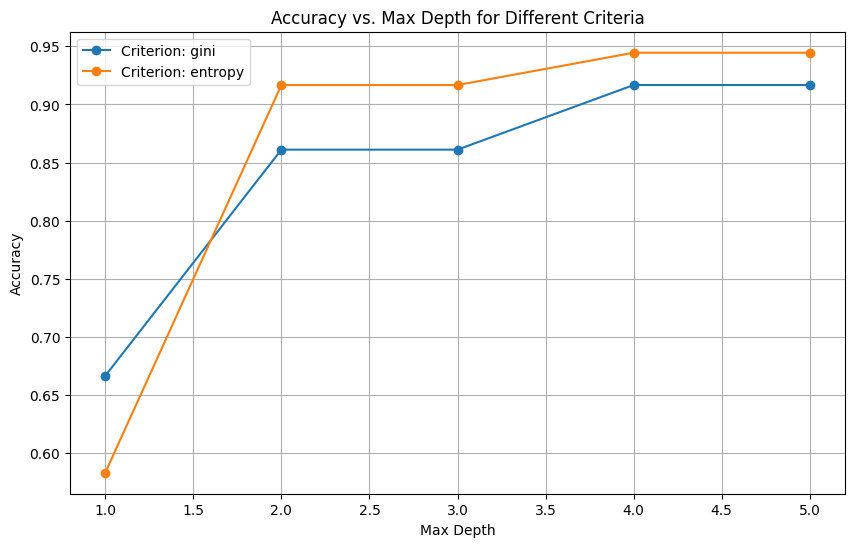

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for criterion in dt_params['criterion']:
    subset = dt_results_df[dt_results_df['criterion'] == criterion]
    ax.plot(subset['max_depth'], subset['accuracy'], marker='o', label=f'Criterion: {criterion}')

ax.set_title('Accuracy vs. Max Depth for Different Criteria')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
ax.legend()
plt.grid(True)
plt.show()

##### We can also plot the decisions that the model took:

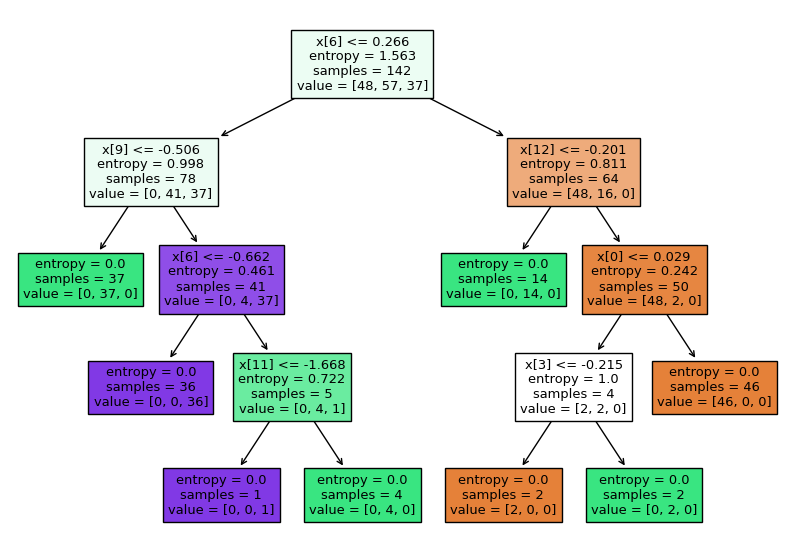

In [ ]:
fig2 = plt.figure(figsize=(10,7))
plot = tree.plot_tree(dt, filled=True)

### • Selecting an optimal permutation (5-fold-cross-validation) with the Grid Search method

#### Create the models and the scoring function (f1)

In [ ]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
scoring = make_scorer(f1_score, average='macro')

#### Perform grid search with 5-fold cross-validation for KNN and Decision Tree

In [ ]:
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, scoring=scoring, n_jobs=-1, verbose=2)
knn_grid_search.fit(X_train_scaled, y_train)
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, scoring=scoring, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             scoring=make_scorer(f1_score, average=macro), verbose=2)

#### Get the best results from each algorithm and summarizing them in a Dataframe

In [ ]:
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_
dt_best_params = dt_grid_search.best_params_
dt_best_score = dt_grid_search.best_score_
results = {'Model': ['KNN', 'Decision Tree'], 'Best Parameters': [knn_best_params, dt_best_params], 'Best Macro-Average F1 Score': [knn_best_score, dt_best_score]}
results_df = pd.DataFrame(results)
display("Summary of Results:", results_df)

'Summary of Results:'

,Model,Best Parameters,Best Macro-Average F1 Score
0,KNN,"{'metric': 'manhattan', 'n_neighbors': 4}",0.951984
1,Decision Tree,"{'criterion': 'entropy', 'max_depth': 3}",0.944040


#### We can see that for the wine dataset we will prefer the KNN algorithm over the Decision Tree algorithm based on our results

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

### Train the best KNN and Decision Tree models on the entire training set

In [ ]:
knn_best_model = KNeighborsClassifier(**knn_best_params)
knn_best_model.fit(X_train_scaled, y_train)
dt_best_model = DecisionTreeClassifier(**dt_best_params, random_state=42)
dt_best_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## Part 4 - Apply on test and show model performance estimation

### Apply the selected feature engineering on the test set and make predictions

In [ ]:
knn_test_predictions = knn_best_model.predict(X_test_scaled)
dt_test_predictions = dt_best_model.predict(X_test_scaled)

### Evaluate the models and print the evaluation results

In [ ]:
knn_test_f1_score = f1_score(y_test, knn_test_predictions, average='macro')
dt_test_f1_score = f1_score(y_test, dt_test_predictions, average='macro')
print("\nKNN Test Macro-Average F1 Score:", knn_test_f1_score)
print("Decision Tree Test Macro-Average F1 Score:", dt_test_f1_score)


KNN Test Macro-Average F1 Score: 0.9731615673644659
Decision Tree Test Macro-Average F1 Score: 0.9193411952032641


### Display the classification report for both models and print the first few classifications on the test set

In [ ]:
print("\nKNN Classification Report:")
knn_df_report = pd.DataFrame(classification_report(y_test, knn_test_predictions, output_dict=True)).transpose()
display(knn_df_report)

print("\nDecision Tree Classification Report:")
dt_df_report = pd.DataFrame(classification_report(y_test, dt_test_predictions, output_dict=True)).transpose()
display(dt_df_report)

print("\nFirst Few Classifications (KNN):")
print(knn_test_predictions[:30])

print("\nFirst Few Classifications (Decision Tree):")
print(dt_test_predictions[:30])


KNN Classification Report:


,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,11.000000
1,1.000000,0.928571,0.962963,14.000000
2,0.916667,1.000000,0.956522,11.000000
accuracy,0.972222,0.972222,0.972222,0.972222
macro avg,0.972222,0.976190,0.973162,36.000000
weighted avg,0.974537,0.972222,0.972312,36.000000



Decision Tree Classification Report:


,precision,recall,f1-score,support
0,0.909091,0.909091,0.909091,11.000000
1,0.866667,0.928571,0.896552,14.000000
2,1.000000,0.909091,0.952381,11.000000
accuracy,0.916667,0.916667,0.916667,0.916667
macro avg,0.925253,0.915584,0.919341,36.000000
weighted avg,0.920370,0.916667,0.917442,36.000000



First Few Classifications (KNN):
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 2 1 0 1 1 0 2 2 0 0 0 2 1 2 2]

First Few Classifications (Decision Tree):
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 1 1 0 1 1 0 2 1 1 0 0 2 1 2 2]
